In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Conv2D, Dropout

import cv2
from matplotlib import pyplot as plt
import pickle
import numpy as np

In [98]:
(train_x, train_y), (test_x, test_y)=keras.datasets.mnist.load_data()
test_x=test_x/255
train_x=train_x/255

In [74]:
def show(mnist, label=np.zeros([10])):
    plt.figure(figsize=(10,10))
    for i in range(len(mnist)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mnist[i], cmap=plt.cm.binary)
        plt.xlabel(label[i])
    plt.show()


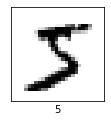

In [108]:
show([train_x[0]],[train_y[0]])

In [73]:
model=keras.Sequential([
    Flatten(input_shape=train_x.shape[1:]),
    Dense(756, activation='relu'),
    Dense(128,activation='relu'),
    Dense(20,activation='sigmoid'),
    Dense(128, activation='relu'),
    Dense(756, activation='relu'),
    Dense(784, activation='sigmoid')
]
)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

1875/1875 [==============================] - 43s 23ms/step - loss: 0.1971 - accuracy: 0.0102


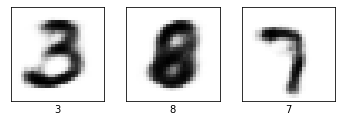

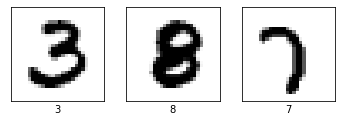

1875/1875 [==============================] - 39s 21ms/step - loss: 0.1235 - accuracy: 0.0109


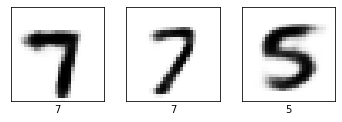

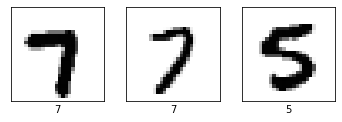

1875/1875 [==============================] - 40s 21ms/step - loss: 0.1108 - accuracy: 0.0112


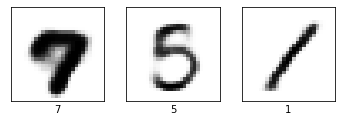

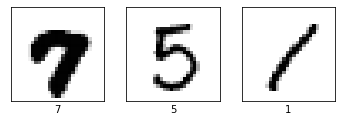

1875/1875 [==============================] - 40s 22ms/step - loss: 0.1048 - accuracy: 0.0119


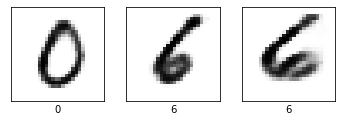

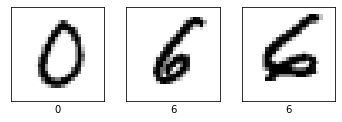

1875/1875 [==============================] - 42s 22ms/step - loss: 0.1014 - accuracy: 0.0128


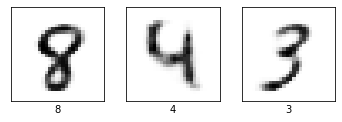

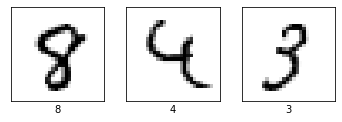

In [75]:
for i in range(0,5):
    model.fit(train_x, train_x.reshape([-1,784]), batch_size=32,shuffle=True, epochs=1)
    c=np.random.randint(0, test_x.shape[0],3)
    label=[test_y[c[0]], test_y[c[1]], test_y[c[2]]]
    c=[test_x[c[0]], test_x[c[1]], test_x[c[2]]]
    c=np.array(c)
    x=model.predict(c)
    x=x.reshape([-1,28,28])
    show(x, label)
    show(c,label)

In [78]:
model1=keras.Sequential([
    Dense(64, activation='relu', input_shape=[10]),
    Dense(128, activation='relu'),
    Dense(756, activation='relu'),
    Dense(784, activation='sigmoid')
]
)
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [79]:
def zeros(t):
    y=np.zeros([t.shape[0],10])
    for i in range(t.shape[0]):
        y[i,t[i]]=1
    return y

1875/1875 [==============================] - 29s 16ms/step - loss: 0.2280 - accuracy: 0.0140


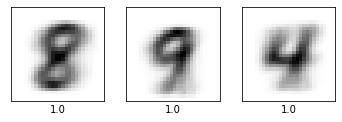

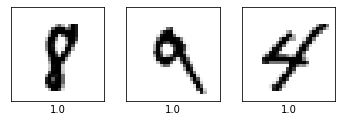

1875/1875 [==============================] - 28s 15ms/step - loss: 0.2217 - accuracy: 0.0148


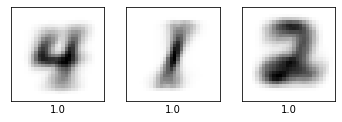

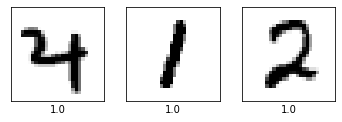

1875/1875 [==============================] - 26s 14ms/step - loss: 0.2215 - accuracy: 0.0144


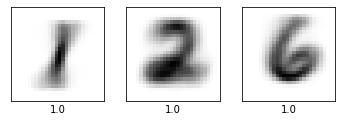

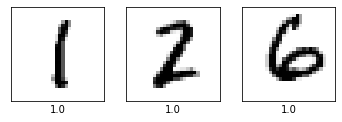

1875/1875 [==============================] - 26s 14ms/step - loss: 0.2214 - accuracy: 0.0144


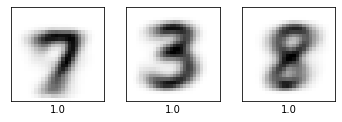

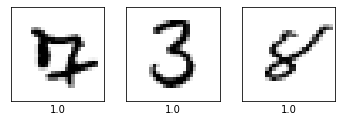

1875/1875 [==============================] - 26s 14ms/step - loss: 0.2212 - accuracy: 0.0146


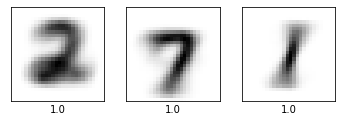

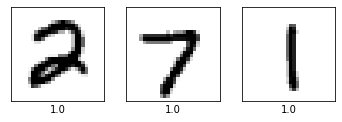

In [81]:
y=zeros(train_y)
y_t=zeros(test_y)
for i in range(0,5):
    model1.fit(y, train_x.reshape([-1,784]), batch_size=32,shuffle=True, epochs=1)
    c=np.random.randint(0, test_x.shape[0],3)
    label=[y_t[c[0]], y_t[c[1]], y_t[c[2]]]
    c=[test_x[c[0]], test_x[c[1]], test_x[c[2]]]
    c=np.array(c)
    label=np.array(label)
    x=model1.predict(label)
    x=x.reshape([-1,28,28])
    label=[np.max(i) for i in label]
    show(x, label)

In [121]:
model2=keras.Sequential([
    Conv2D(64,(3,3),padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
]
)
model2.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [122]:
X=train_x.reshape([-1,28,28,1])
X_t=test_x.reshape([-1,28,28,1])
print(X.shape, train_y.shape)
model2.fit(X, train_y, validation_data=(X_t, test_y), epochs=10, batch_size=32)

(60000, 28, 28, 1) (60000,)
Epoch 1/10
1875/1875 [==============================] - 235s 126ms/step - loss: 0.2066 - accuracy: 0.9361 - val_loss: 0.0422 - val_accuracy: 0.9862
Epoch 2/10
1875/1875 [==============================] - 246s 131ms/step - loss: 0.0869 - accuracy: 0.9738 - val_loss: 0.0311 - val_accuracy: 0.9897
Epoch 3/10
1875/1875 [==============================] - 235s 125ms/step - loss: 0.0702 - accuracy: 0.9788 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 4/10
  54/1875 [..............................] - ETA: 3:38 - loss: 0.0490 - accuracy: 0.98

KeyboardInterrupt: 

In [125]:
for i in range(10):
    print(np.argmax(model2.predict(model1.predict(zeros(np.array([i]))).reshape([-1,28,28,1]))))

0
1
2
3
4
5
6
7
8
9


In [128]:
a=model2.predict(model.predict(test_x).reshape([-1,28,28,1]))
a=[np.argmax(i) for i in a]
c=0
for i in range(len(a)):
    if a[i]==test_y[i]:
        c+=1
print(c/len(a))

0.9545
